- La función **cv.cvtColor** se utiliza para convertir la imagen de su espacio de color original (BGR) a escala de grises
- El argumento **cmap="gray"** indica que se desea utilizar una paleta de colores en escala de grises para mostrar la imagen.

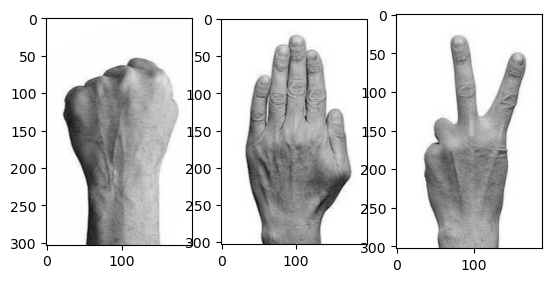

In [34]:
import cv2 as cv
from matplotlib import pyplot as plt

piedra = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\piedra.jpg")
papel = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\papel.jpg")
tijera = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\tijera.jpg")

fig,axs = plt.subplots(1,3)
axs[0].imshow(cv.cvtColor(piedra,cv.COLOR_BGR2GRAY),cmap="gray")
axs[1].imshow(cv.cvtColor(papel,cv.COLOR_BGR2GRAY),cmap="gray")
axs[2].imshow(cv.cvtColor(tijera,cv.COLOR_BGR2GRAY),cmap="gray")

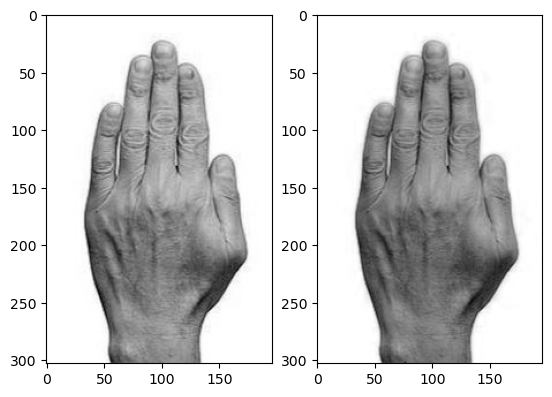

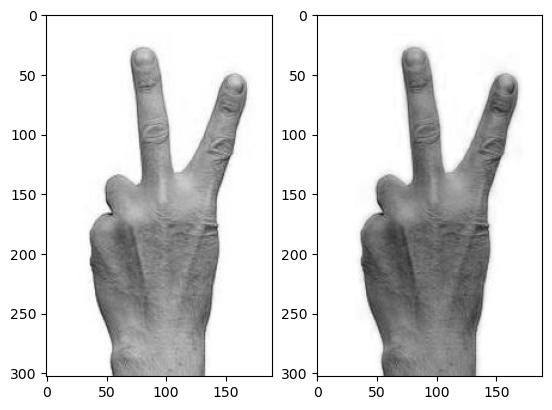

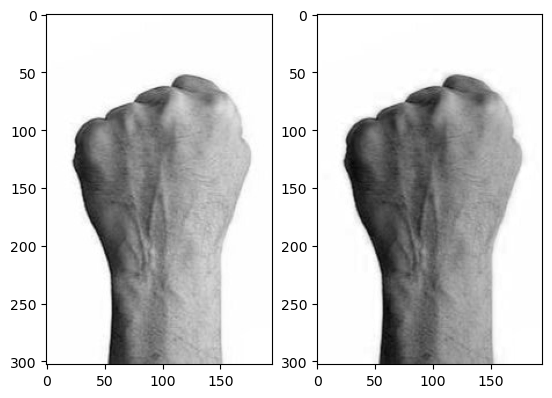

In [53]:
fig,axs = plt.subplots(1,2)
axs[0].imshow(cv.cvtColor(papel,cv.COLOR_BGR2GRAY),cmap="gray")
# Extrae el canal azul de la imagen "papel" utilizando la indexación papel[:,:,0].
axs[1].imshow(papel[:,:,0],cmap="gray")
# Asigna el canal azul extraído a la variable img_papel para su uso posterior.
img_papel=papel[:,:,0]

fig,axs = plt.subplots(1,2)
axs[0].imshow(cv.cvtColor(tijera,cv.COLOR_BGR2GRAY),cmap="gray")
axs[1].imshow(tijera[:,:,0],cmap="gray")
img_tijera=tijera[:,:,0]

fig,axs = plt.subplots(1,2)
axs[0].imshow(cv.cvtColor(piedra,cv.COLOR_BGR2GRAY),cmap="gray")
axs[1].imshow(piedra[:,:,0],cmap="gray")
img_piedra=piedra[:,:,0]

Aplicación de un filtro Gaussiano cuya función es difuminar:
- **src**: La imagen de entrada, en este caso img_papel que representa el canal azul extraído de la imagen original.
- **ksize**: Un tuple que define el tamaño del núcleo del filtro (ancho, alto). Aquí se usa (5, 5), creando un núcleo cuadrado de 5x5 píxeles.
- **sigmaX y sigmaY**: Valores que controlan la desviación estándar del filtro en las direcciones horizontal y vertical, respectivamente. Cuanto mayor sea el valor, más difuminada será la imagen. Aquí se usan ambos valores a 20, generando un desenfoque significativo.

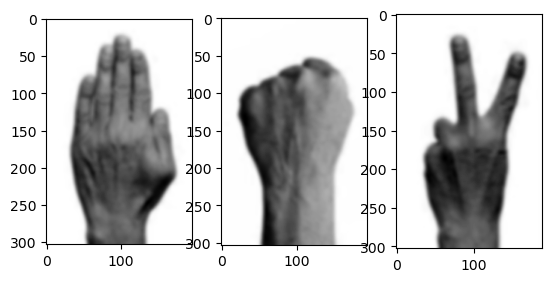

In [55]:
fig,axs = plt.subplots(1,3)

img_papel = cv.GaussianBlur(src=img_papel, ksize=(5,5), sigmaX=20, sigmaY=20)
img_piedra = cv.GaussianBlur(src=img_piedra, ksize=(5,5), sigmaX=20, sigmaY=20)
img_tijera = cv.GaussianBlur(src=img_tijera, ksize=(5,5), sigmaX=20, sigmaY=20)

axs[0].imshow(img_papel,cmap="gray")
axs[1].imshow(img_piedra,cmap="gray")
axs[2].imshow(img_tijera,cmap="gray")

- El código convierte la imagen del canal azul difuminada en una imagen binaria inversa, donde los píxeles por debajo de 160 se vuelven negros y los píxeles por encima de 160 se vuelven blancos.
- La imagen umbralizada se muestra en escala de grises.

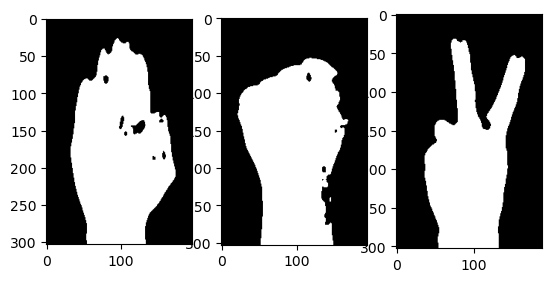

In [66]:
fig,axs = plt.subplots(1,3)

ret,th1 = cv.threshold(img_papel,160, 255,cv.THRESH_BINARY_INV)
plt.imshow(th1,cmap="gray")
ret,th2 = cv.threshold(img_piedra,180, 255,cv.THRESH_BINARY_INV)
plt.imshow(th2,cmap="gray")
ret,th3 = cv.threshold(img_tijera,160, 255,cv.THRESH_BINARY_INV)
plt.imshow(th3,cmap="gray")


axs[0].imshow(th1,cmap="gray")
axs[1].imshow(th2,cmap="gray")
axs[2].imshow(th3,cmap="gray")

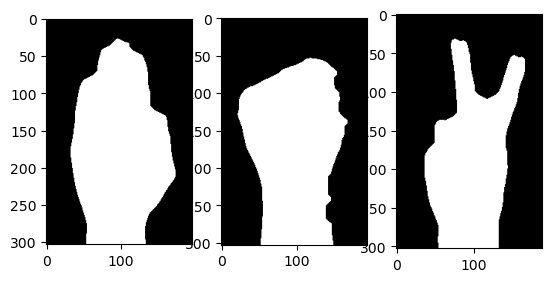

In [67]:
import numpy as np

fig,axs = plt.subplots(1,3)


kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))

img2_papel = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel, iterations=5)
img2_papel = cv.morphologyEx(img2_papel, cv.MORPH_OPEN, kernel, iterations=1)

img2_piedra = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel, iterations=5)
img2_piedra = cv.morphologyEx(img2_piedra, cv.MORPH_OPEN, kernel, iterations=1)

img2_tijera = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations=5)
img2_tijera = cv.morphologyEx(img2_tijera, cv.MORPH_OPEN, kernel, iterations=1)



axs[0].imshow(img2_papel,cmap="gray")
axs[1].imshow(img2_piedra,cmap="gray")
axs[2].imshow(img2_tijera,cmap="gray")

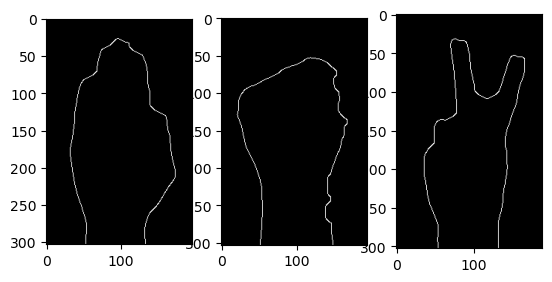

In [70]:
min=50
max=100
fig,axs = plt.subplots(1,3)


cn_papel = cv.Canny(img2_papel,min,max)
cn_piedra = cv.Canny(img2_piedra,min,max)
cn_tijera = cv.Canny(img2_tijera,min,max)

axs[0].imshow(cn_papel, cmap = "gray")
axs[1].imshow(cn_piedra, cmap = "gray")
axs[2].imshow(cn_tijera, cmap = "gray")